# Anuncios de empleo falsos en el mundo

David Ravelli, Luca Roggio - UEM - curso 2024-25

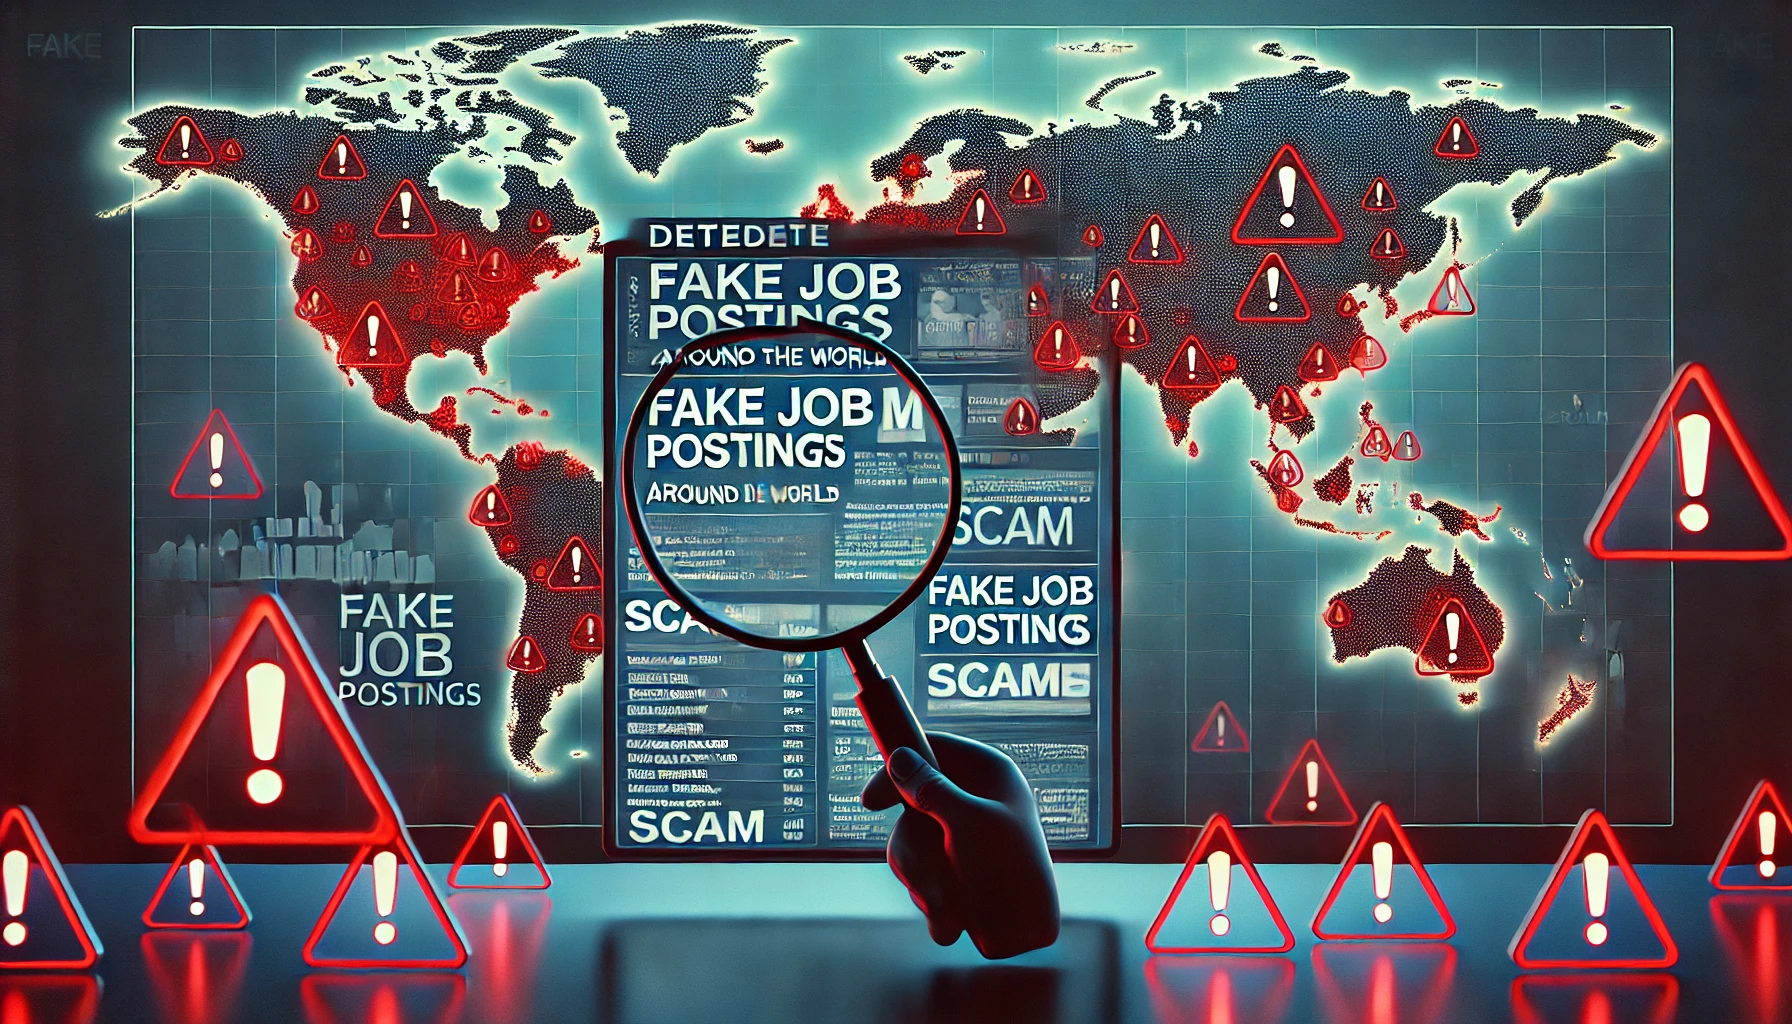

*Esta imagen fue generada por inteligencia artificial.*

### Objetivos

En esta análisis, abordaremos los factores y patrones asociados con el fraude en anuncios de empleo mediante una serie de visualizaciones que destacan distintos aspectos de los datos. Comenzaremos analizando el número y el porcentaje de anuncios fraudulentos en función de variables clave como el nivel de educación requerido, el departamento, la ciudad, el nivel de experiencia requerido y el tipo de empleo. Estos gráficos nos permiten identificar cuáles de estos factores pueden estar más relacionados con los anuncios fraudulentos.

Además, para estudiar los elementos visuales y estructurales de los anuncios, presentamos un gráfico de torta que compara el porcentaje de anuncios fraudulentos según la presencia o ausencia del logotipo de la empresa, un histograma que muestra la relación entre los benefits ofrecidos y el fraude, y un mapa de calor para explorar la correlación entre variables binarias como teletrabajo, logotipo de la empresa, preguntas adicionales y el fraude. Este enfoque exhaustivo permite tanto una perspectiva general como un análisis detallado de los distintos factores asociados con la ocurrencia de fraudes.

### Estado del arte
El aumento de plataformas de búsqueda de empleo en línea ha facilitado la aparición de fraudes en anuncios laborales. Estudios recientes indican que una parte considerable de estas ofertas puede ser fraudulenta, generando desconfianza entre los usuarios y pérdidas económicas.

Ejemplo de estudio recente: https://consumer.ftc.gov/articles/job-scams#examples, Comisión Federal de Comercion (FTC) de los EE.UU

Se ha utilizado el análisis de datos para identificar características comunes en anuncios fraudulentos. Factores como el título del trabajo, la ubicación, el rango salarial y el perfil de la empresa son cruciales para detectar fraudes. Por ejemplo, las ofertas con salarios muy altos o que requieren poca experiencia suelen ser sospechosas.

El dataset que estamos analizando incluye columnas clave como descripción, requisitos y beneficios, que permiten explorar la legitimidad de las ofertas. Además, variables como has_company_logo pueden influir en la percepción de autenticidad.

El estudio de fraudes en anuncios laborales es fundamental para crear sistemas más seguros en la búsqueda de empleo y para informar a los solicitantes sobre prácticas sospechosas en el entorno digital.

### Metodologia utilizada
Para llevar a cabo el análisis de las fraudes en anuncios laborales, se siguió una metodología estructurada que incluye los siguientes pasos:

1.	Carga y Preprocesamiento de Datos:
   •	Se cargó el conjunto de datos desde un archivo CSV utilizando la biblioteca pandas. Se realizó una copia del conjunto de datos         original para mantener la integridad de los datos iniciales.
   •	Se reemplazaron los valores ‘nan’ por np.nan para manejar los valores faltantes.
2.	Limpieza de Datos:
    •	Se eliminaron las filas que contenían valores faltantes en las columnas relevantes, como required_education y fraudulent, asegurando         que solo se consideraran datos completos para el análisis posterior.
3.	Análisis de Frecuencias:
	•	Se calcularon las frecuencias de anuncios fraudulentos en función de la educación requerida. Se agruparon los datos por required_education, sumando los anuncios fraudulentos y ordenándolos de mayor a menor.
4.	Visualización de Resultados:
	•	Se utilizaron gráficos de barras para representar el número de anuncios fraudulentos según la educación requerida y su porcentaje respecto al total de anuncios en cada categoría. Se empleó la biblioteca seaborn para una visualización más atractiva.
	•	También se realizó un análisis del número de anuncios fraudulentos en función de la ciudad y si estos incluían un logo de la empresa, presentando estos resultados mediante gráficos de dispersión y gráficos de pastel, respectivamente.
5.	Análisis de Palabras Clave en Beneficios:
	•	Se identificaron palabras clave relacionadas con beneficios (como “dental”, “medical”, “insurance”) y se contó cuántos anuncios fraudulentos las contenían en la columna benefits. Los resultados se visualizaron en un gráfico de barras.
6.	Análisis de Correlación:
	•	Finalmente, se calculó la matriz de correlación entre variables binarias como telecommuting, has_company_logo, has_questions y fraudulent. Se utilizó un mapa de calor para mostrar las correlaciones, ayudando a identificar patrones significativos entre las variables.

Esta metodología permitió una comprensión profunda de las características asociadas con los anuncios laborales fraudulentos, facilitando la identificación de patrones y tendencias en los datos analizados.

In [104]:
#Importamos las principales bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [106]:
#Cargo los datos
file_path = '/Users/davidravelli/AI2024/fake_job_postings.csv'
data = pd.read_csv(file_path)

#Hago una copia del database original

original = data.copy()

data.replace('nan', np.nan, inplace=True)

data.head()

job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [108]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

### Resultados obtenidos

In [72]:
#Hago un análisis general con perfil_report
from pandas_profiling import ProfileReport
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

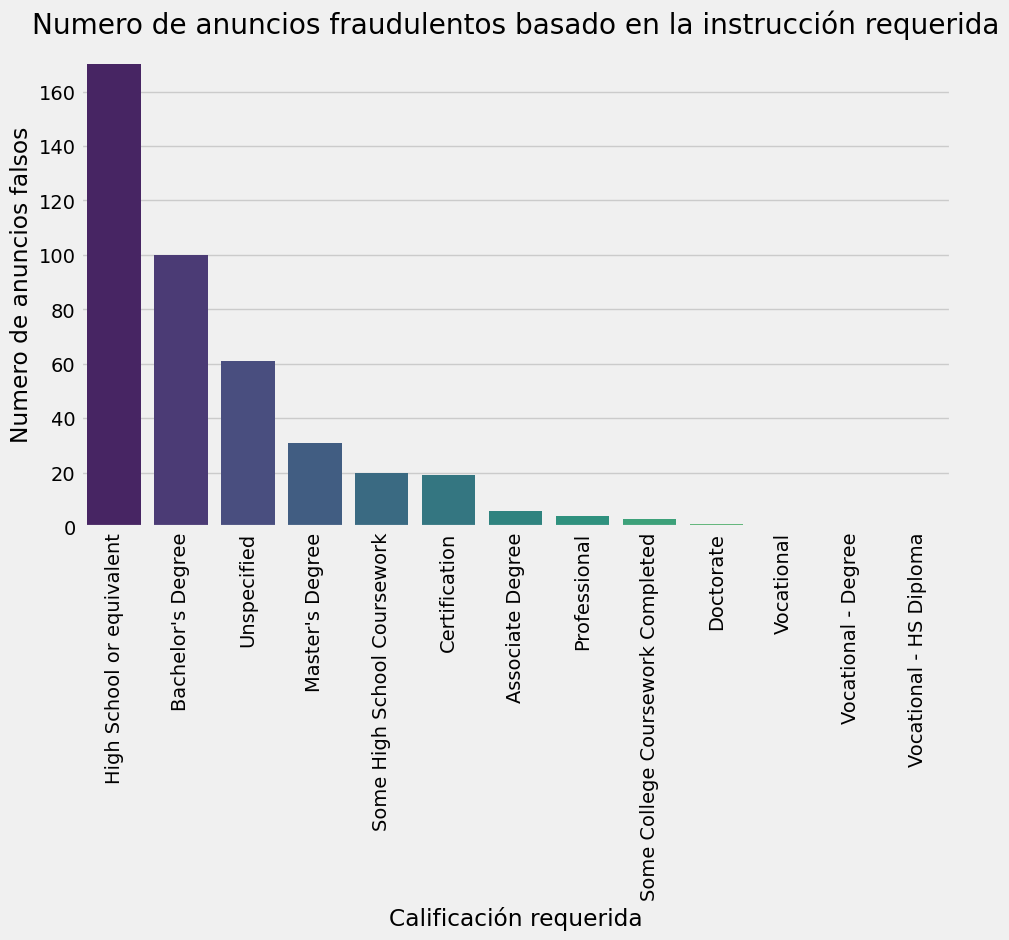

In [10]:
#Numero de anuncios fraudolentos basado en la instrucción requerida
data_cleaned = data.dropna(subset=['required_education', 'fraudulent'])

data_cleaned['required_education'] = data_cleaned['required_education'].astype(str)

fraud_counts = data_cleaned.groupby('required_education')['fraudulent'].sum().reset_index()

fraud_counts = fraud_counts.sort_values(by='fraudulent', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_counts, x = 'required_education', y = 'fraudulent', palette='viridis')

plt.xlabel('Calificación requerida')
plt.ylabel('Numero de anuncios falsos')
plt.title('Numero de anuncios fraudulentos basado en la instrucción requerida')
plt.xticks(rotation = 90)
plt.show()

El nivel educativo ‘High School o equivalente’ muestra el mayor número de fraudes en anuncios de trabajo, superando con creces a otras categorías. Esto indica que las personas con este título son las más vulnerables o frecuentemente objetivo de estafas laborales.

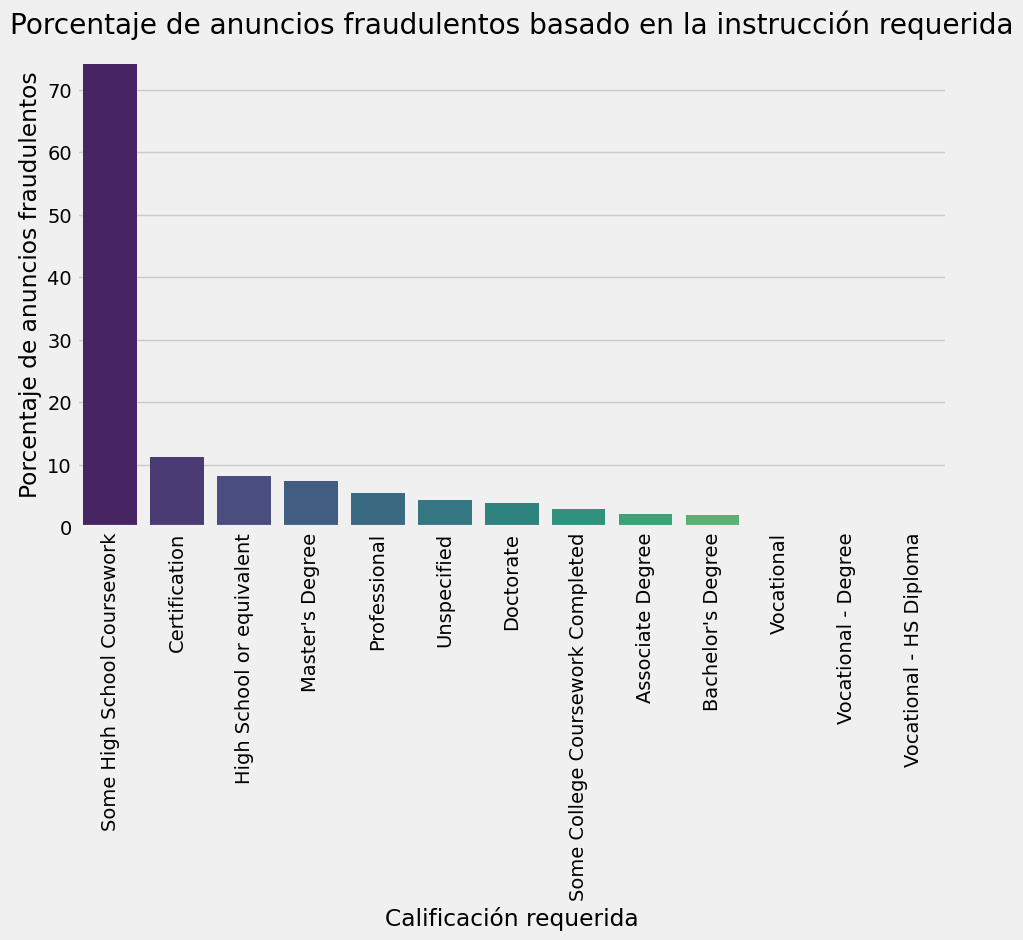

In [11]:
#Numero de anuncios fraudulentos basado en la instrucción requerida (%)
# Filtramos los datos que no tienen instrucción requerida o datos de fraude
data_cleaned = data.dropna(subset=['required_education', 'fraudulent'])

# Agrupamos los datos por instrucción requerida y calculamos el total de anuncios y los fraudulentos
education_counts = data_cleaned.groupby('required_education').agg(
    total_ads=('fraudulent', 'count'),
    fraudulent_ads=('fraudulent', 'sum')
).reset_index()

# Calculamos el porcentaje de anuncios fraudulentos por instrucción requerida
education_counts['fraud_percentage'] = (education_counts['fraudulent_ads'] / education_counts['total_ads']) * 100

# Ordenamos por porcentaje de anuncios fraudulentos en orden descendente
education_counts = education_counts.sort_values(by='fraud_percentage', ascending=False)

# Creamos el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=education_counts, x='required_education', y='fraud_percentage', palette='viridis')

# Etiquetas y título
plt.xlabel('Calificación requerida')
plt.ylabel('Porcentaje de anuncios fraudulentos')
plt.title('Porcentaje de anuncios fraudulentos basado en la instrucción requerida (%)')
plt.xticks(rotation=90)
plt.show()

El nivel educativo ‘Some High School Coursework’ destaca con el mayor porcentaje de fraudes en anuncios de trabajo. Este gráfico, basado en porcentajes, revela que las personas que han cursado estudios de secundaria parcial son las más propensas a ser objetivo de estafas laborales

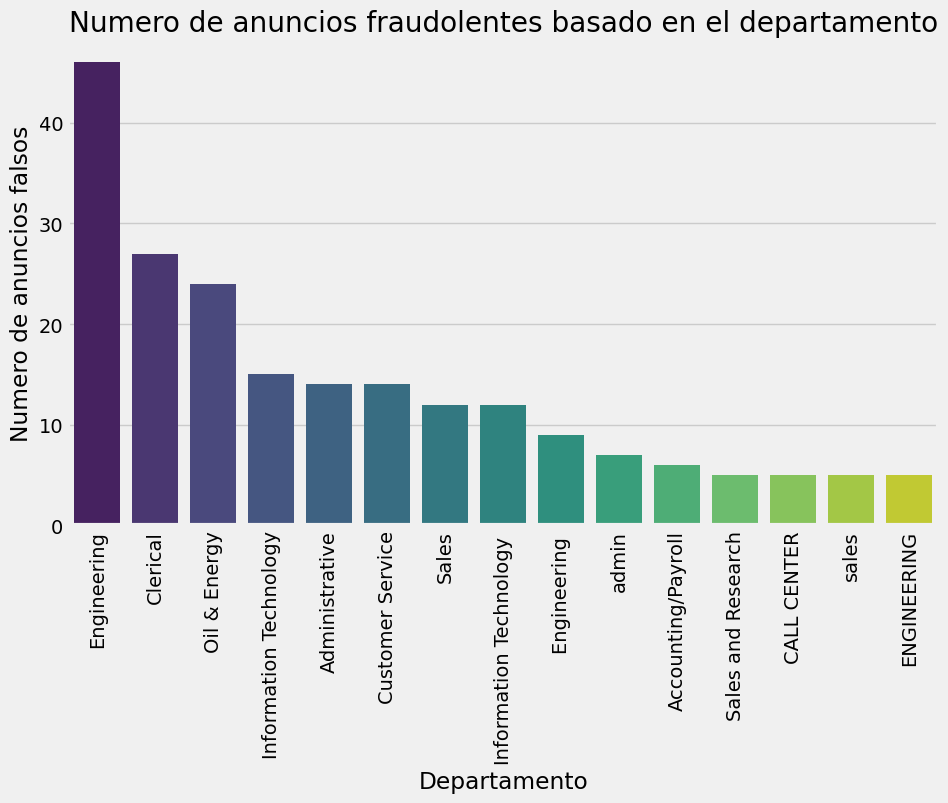

In [12]:
#Numero de anuncios fraudolentes bassado en el departamento
data_cleaned = data.dropna(subset=['department', 'fraudulent'])

data_cleaned['department'] = data_cleaned['department'].astype(str)

fraud_counts = data_cleaned.groupby('department')['fraudulent'].sum().reset_index()

fraud_counts = fraud_counts.sort_values(by='fraudulent', ascending=False)

#Solo selecciono los primeros 15 para aumentar la legibilidad
fraud_counts = fraud_counts.head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_counts, x = 'department', y = 'fraudulent', palette='viridis')

plt.xlabel('Departamento')
plt.ylabel('Numero de anuncios falsos')
plt.title('Numero de anuncios fraudolentes basado en el departamento')
plt.xticks(rotation = 90)
plt.show()

El departamento de ‘Engineering’ presenta el mayor número de fraudes en anuncios de trabajo, superando a otros sectores. Esto sugiere que los profesionales de ingeniería son los más afectados o frecuentemente objetivo de este tipo de estafas laborales.

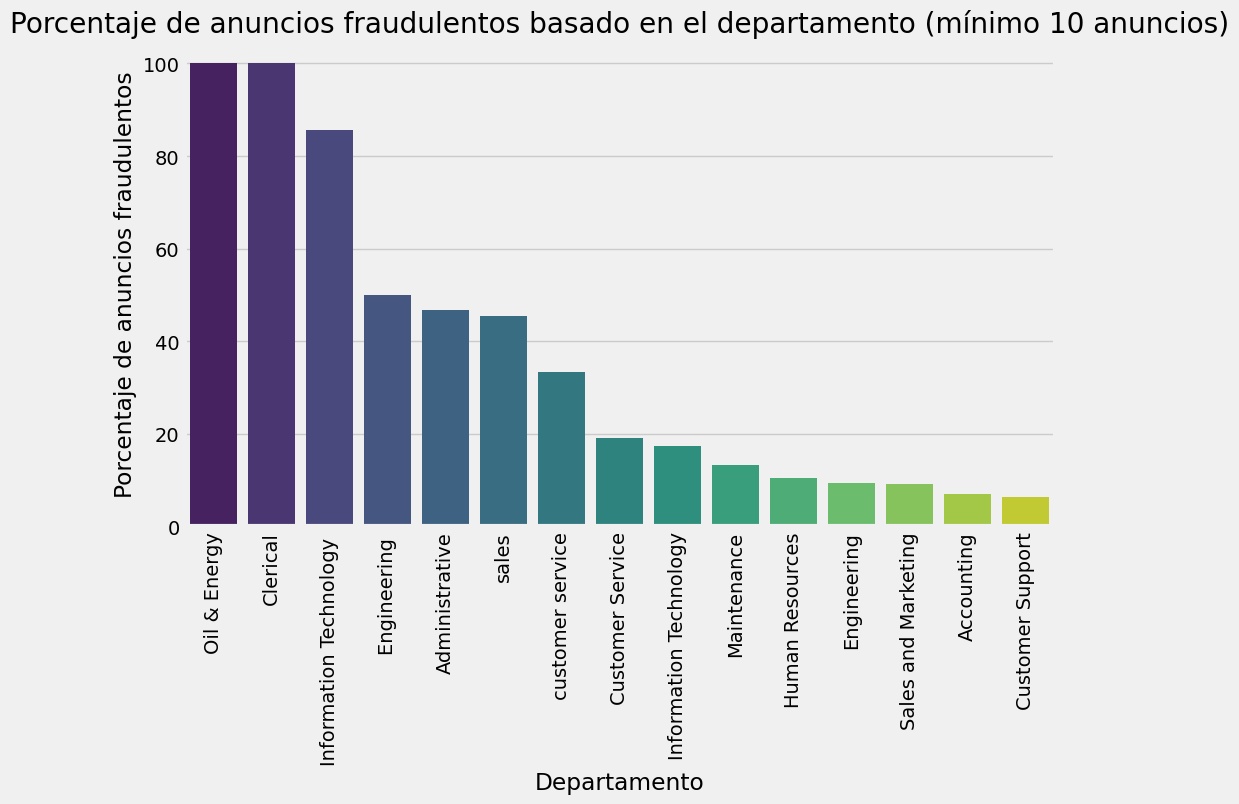

In [13]:
#Numero de anuncios fraudolentes bassado en el departamento (%) (filtrado: al menos 10 anuncios)

# Filtramos los datos que no tienen departamento o datos de fraude
data_cleaned = data.dropna(subset=['department', 'fraudulent'])

# Agrupamos los datos por departamento y calculamos el total de anuncios y los fraudulentos
department_counts = data_cleaned.groupby('department').agg(
    total_ads=('fraudulent', 'count'),  # Total de anuncios en cada departamento
    fraudulent_ads=('fraudulent', 'sum')  # Número de anuncios fraudulentos en cada departamento
).reset_index()

# Filtramos los departamentos que tienen al menos 10 anuncios
department_counts = department_counts[department_counts['total_ads'] >= 10]

# Calculamos el porcentaje de anuncios fraudulentos por departamento
department_counts['fraud_percentage'] = (department_counts['fraudulent_ads'] / department_counts['total_ads']) * 100

# Ordenamos por porcentaje de anuncios fraudulentos en orden descendente
department_counts = department_counts.sort_values(by='fraud_percentage', ascending=False)

# Seleccionamos los primeros 15 departamentos para mayor legibilidad
department_counts = department_counts.head(15)

# Creamos el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=department_counts, x='department', y='fraud_percentage', palette='viridis')

# Etiquetas y título
plt.xlabel('Departamento')
plt.ylabel('Porcentaje de anuncios fraudulentos')
plt.title('Porcentaje de anuncios fraudulentos basado en el departamento (mínimo 10 anuncios) (%)')
plt.xticks(rotation=90)
plt.show()

El departamento de ‘Oil & Energy’ registra el mayor porcentaje de fraudes en anuncios de trabajo. Este gráfico, basado en porcentajes, muestra que los profesionales de este sector son los más susceptibles a ser objetivo de estafas laborales.

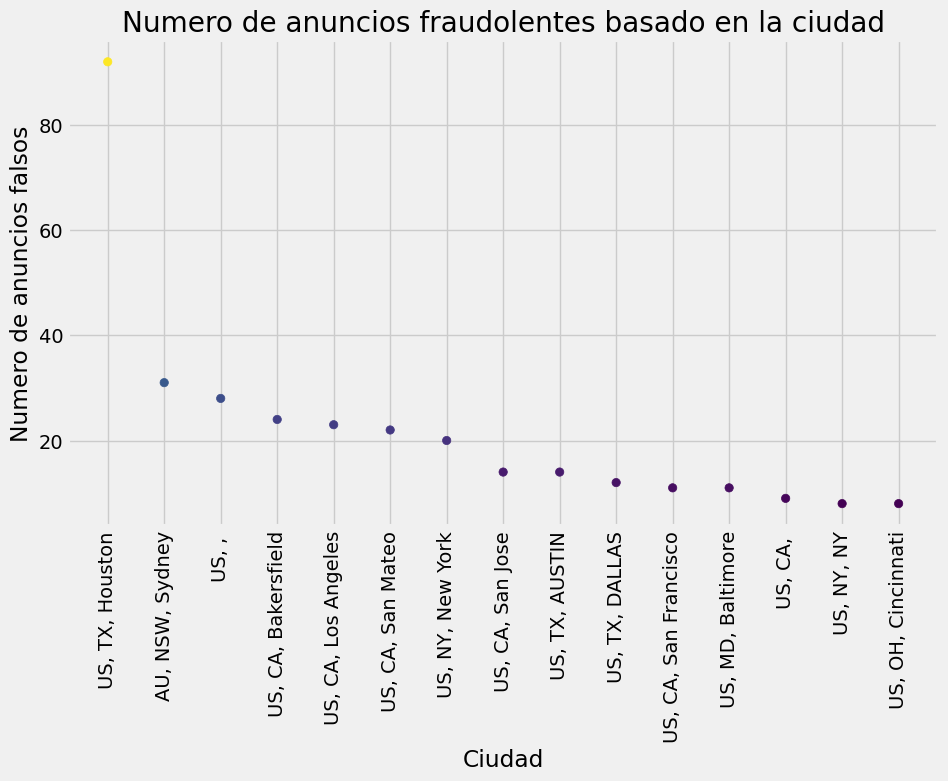

In [47]:
#Numero de anuncios fraudolentes basado en la ciudad
data_cleaned = data.dropna(subset=['location', 'fraudulent'])

data_cleaned['location'] = data_cleaned['location'].astype(str)

fraud_counts = data_cleaned.groupby('location')['fraudulent'].sum().reset_index()

fraud_counts = fraud_counts.sort_values(by='fraudulent', ascending=False)

#Solo selecciono los primeros 15 para aumentar la legibilidad
fraud_counts = fraud_counts.head(15)

plt.figure(figsize=(10, 6))
plt.scatter(fraud_counts['location'], fraud_counts['fraudulent'], c=fraud_counts['fraudulent'], cmap='viridis')

plt.xlabel('Ciudad')
plt.ylabel('Numero de anuncios falsos')
plt.title('Numero de anuncios fraudolentes basado en la ciudad')
plt.xticks(rotation = 90)
plt.show()

La ciudad de ‘US, TX, Houston’ registra el mayor número de fraudes en anuncios de trabajo, superando a otras ubicaciones. Esto sugiere que Houston es una de las ciudades más afectadas por estafas laborales en el estado de Texas.

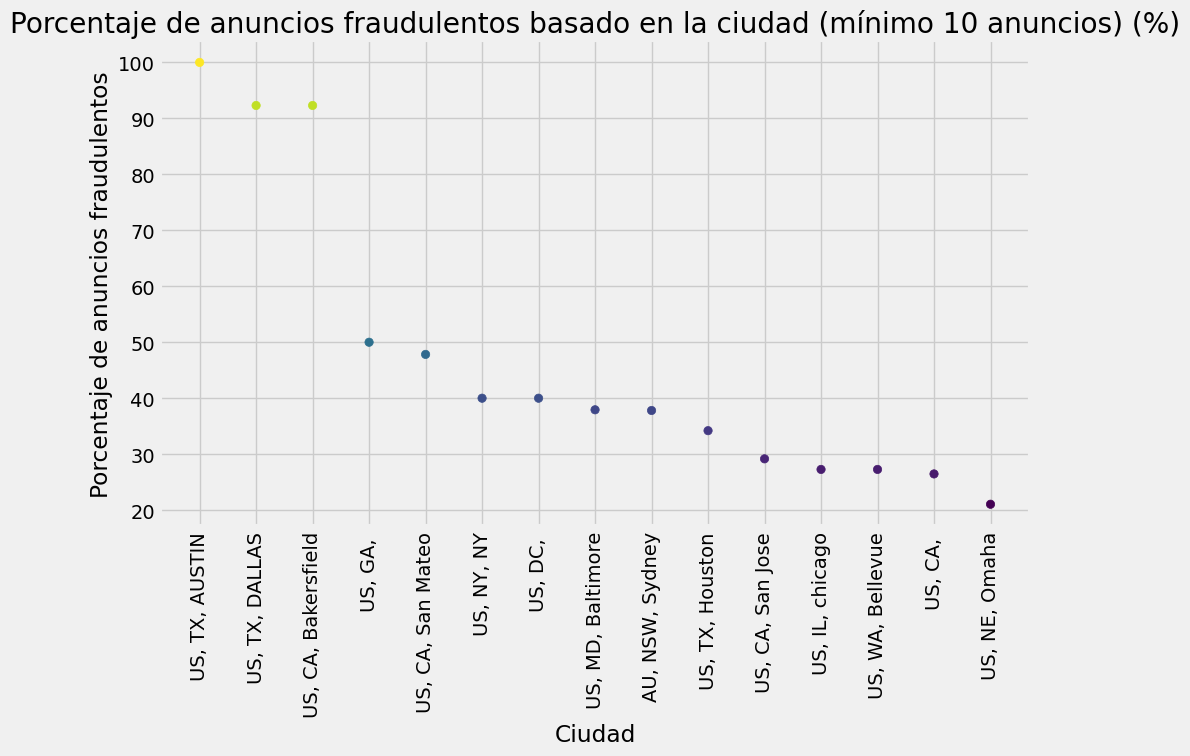

In [49]:
#Numero de anuncios fraudolentes basado en la ciudad (%) (filtrado: al menos 10 anuncios)
data_cleaned = data.dropna(subset=['location', 'fraudulent'])

# Agrupamos los datos por departamento y calculamos el total de anuncios y los fraudulentos
department_counts = data_cleaned.groupby('location').agg(
    total_ads=('fraudulent', 'count'),  # Total de anuncios en cada departamento
    fraudulent_ads=('fraudulent', 'sum')  # Número de anuncios fraudulentos en cada departamento
).reset_index()

department_counts = department_counts[department_counts['total_ads'] >= 10]

# Calculamos el porcentaje de anuncios fraudulentos por departamento
department_counts['fraud_percentage'] = (department_counts['fraudulent_ads'] / department_counts['total_ads']) * 100

# Ordenamos por porcentaje de anuncios fraudulentos en orden descendente
department_counts = department_counts.sort_values(by='fraud_percentage', ascending=False)

# Seleccionamos los primeros 15 departamentos para mayor legibilidad
department_counts = department_counts.head(15)

# Creamos el gráfico
plt.figure(figsize=(10, 6))
plt.scatter(department_counts['location'], department_counts['fraud_percentage'], c=department_counts['fraud_percentage'], cmap='viridis')

# Etiquetas y título
plt.xlabel('Ciudad')
plt.ylabel('Porcentaje de anuncios fraudulentos')
plt.title('Porcentaje de anuncios fraudulentos basado en la ciudad (mínimo 10 anuncios) (%)')
plt.xticks(rotation=90)
plt.show()

La ciudad de ‘US, TX, Austin’ presenta el mayor porcentaje de fraudes en anuncios de trabajo. Este gráfico, basado en porcentajes, muestra que Austin es una de las localidades más vulnerables a estafas laborales en Texas.

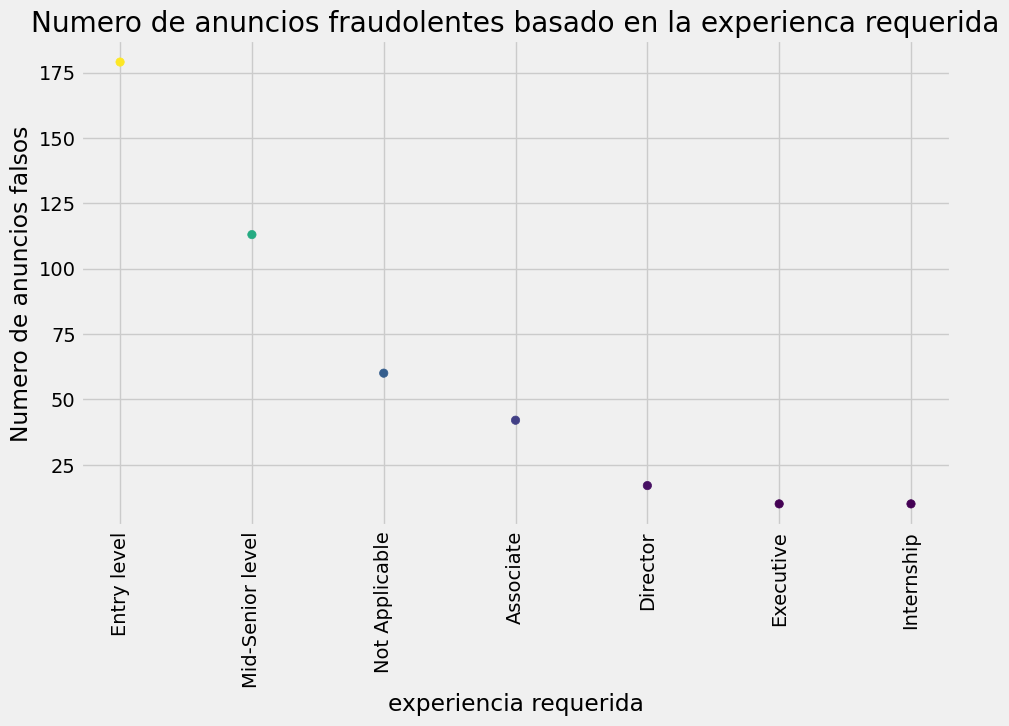

In [55]:
#Numero de anuncios fraudolentes basado en la experienca requerida
data_cleaned = data.dropna(subset=['required_experience', 'fraudulent'])

data_cleaned['required_experience'] = data_cleaned['required_experience'].astype(str)

fraud_counts = data_cleaned.groupby('required_experience')['fraudulent'].sum().reset_index()

fraud_counts = fraud_counts.sort_values(by='fraudulent', ascending=False)

#Solo selecciono los primeros 15 para aumentar la legibilidad
fraud_counts = fraud_counts.head(15)

plt.figure(figsize=(10, 6))
plt.scatter(fraud_counts['required_experience'], fraud_counts['fraudulent'], c=fraud_counts['fraudulent'], cmap='viridis')

plt.xlabel('experiencia requerida')
plt.ylabel('Numero de anuncios falsos')
plt.title('Numero de anuncios fraudolentes basado en la experienca requerida')
plt.xticks(rotation = 90)
plt.show()

El nivel de experiencia ‘Entry Level’ presenta el mayor número de fraudes en anuncios de trabajo, superando a otros niveles. Esto indica que los profesionales principiantes son los más afectados o frecuentemente objetivo de estafas laborales.

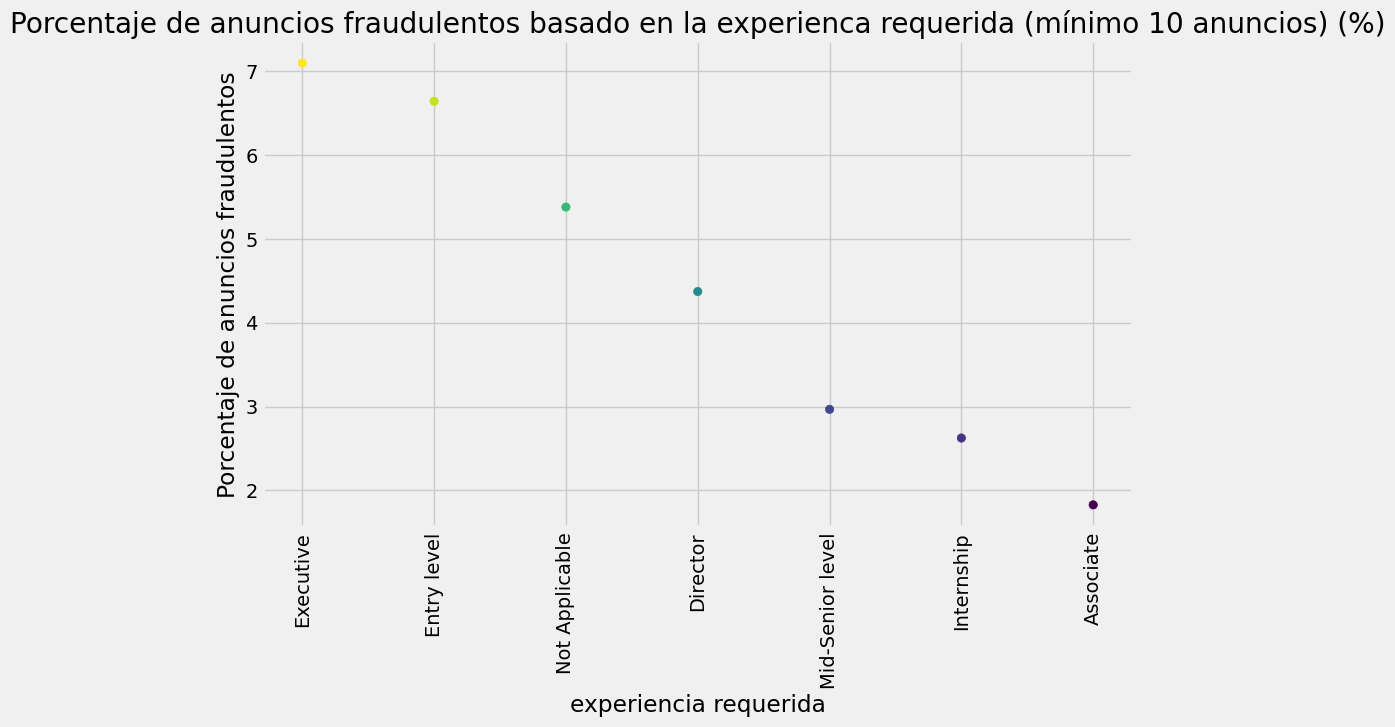

In [57]:
#Numero de anuncios fraudolentes basado en la experienca requerida (%) (al menos 10 anuncios)
data_cleaned = data.dropna(subset=['required_experience', 'fraudulent'])

# Agrupamos los datos por departamento y calculamos el total de anuncios y los fraudulentos
department_counts = data_cleaned.groupby('required_experience').agg(
    total_ads=('fraudulent', 'count'),  # Total de anuncios en cada departamento
    fraudulent_ads=('fraudulent', 'sum')  # Número de anuncios fraudulentos en cada departamento
).reset_index()

department_counts = department_counts[department_counts['total_ads'] >= 10]

# Calculamos el porcentaje de anuncios fraudulentos por departamento
department_counts['fraud_percentage'] = (department_counts['fraudulent_ads'] / department_counts['total_ads']) * 100

# Ordenamos por porcentaje de anuncios fraudulentos en orden descendente
department_counts = department_counts.sort_values(by='fraud_percentage', ascending=False)

# Seleccionamos los primeros 15 departamentos para mayor legibilidad
department_counts = department_counts.head(15)

# Creamos el gráfico
plt.figure(figsize=(10, 6))
plt.scatter(department_counts['required_experience'], department_counts['fraud_percentage'], c=department_counts['fraud_percentage'], cmap='viridis')

# Etiquetas y título
plt.xlabel('experiencia requerida')
plt.ylabel('Porcentaje de anuncios fraudulentos')
plt.title('Porcentaje de anuncios fraudulentos basado en la experienca requerida (mínimo 10 anuncios) (%)')
plt.xticks(rotation=90)
plt.show()

El nivel de experiencia ‘Executive’ registra el mayor porcentaje de fraudes en anuncios de trabajo. Este gráfico, basado en porcentajes, sugiere que los profesionales en posiciones ejecutivas son los más vulnerables a ser objetivo de estafas laborales.

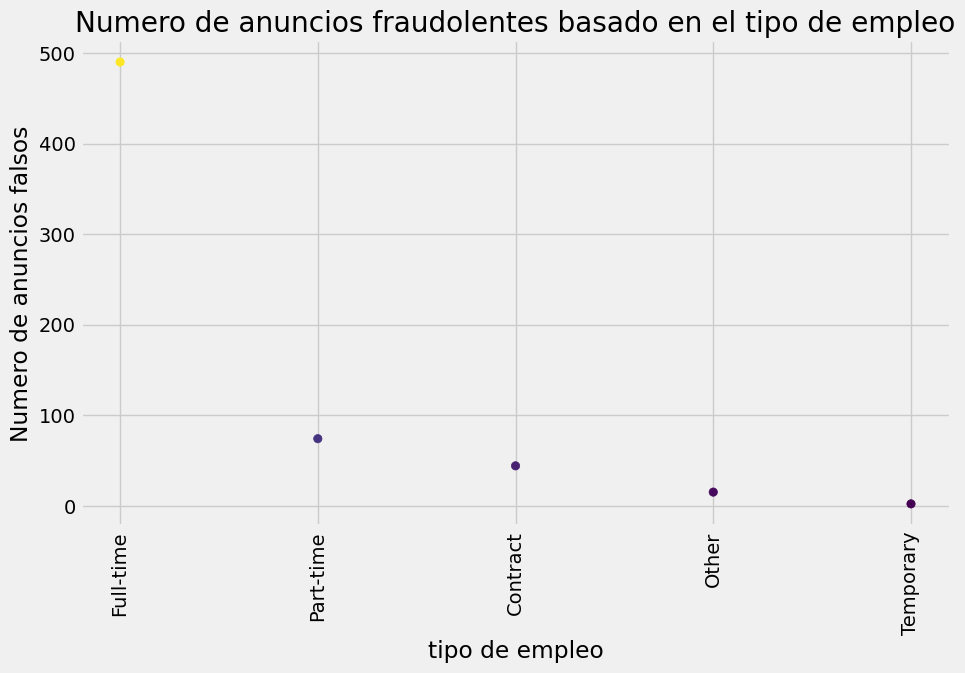

In [59]:
#Numero de anuncios fraudolentes basado en el tipo de empleo
data_cleaned = data.dropna(subset=['employment_type', 'fraudulent'])

data_cleaned['employment_type'] = data_cleaned['employment_type'].astype(str)

fraud_counts = data_cleaned.groupby('employment_type')['fraudulent'].sum().reset_index()

fraud_counts = fraud_counts.sort_values(by='fraudulent', ascending=False)

#Solo selecciono los primeros 15 para aumentar la legibilidad
fraud_counts = fraud_counts.head(15)

plt.figure(figsize=(10, 6))
plt.scatter(fraud_counts['employment_type'], fraud_counts['fraudulent'], c=fraud_counts['fraudulent'], cmap='viridis')

plt.xlabel('tipo de empleo')
plt.ylabel('Numero de anuncios falsos')
plt.title('Numero de anuncios fraudolentes basado en el tipo de empleo')
plt.xticks(rotation = 90)
plt.show()

El tipo de empleo ‘Full Time’ presenta el mayor número de fraudes en anuncios de trabajo, superando a otras modalidades. Esto sugiere que los trabajos a tiempo completo son los más afectados o frecuentemente objetivo de estafas laborales.

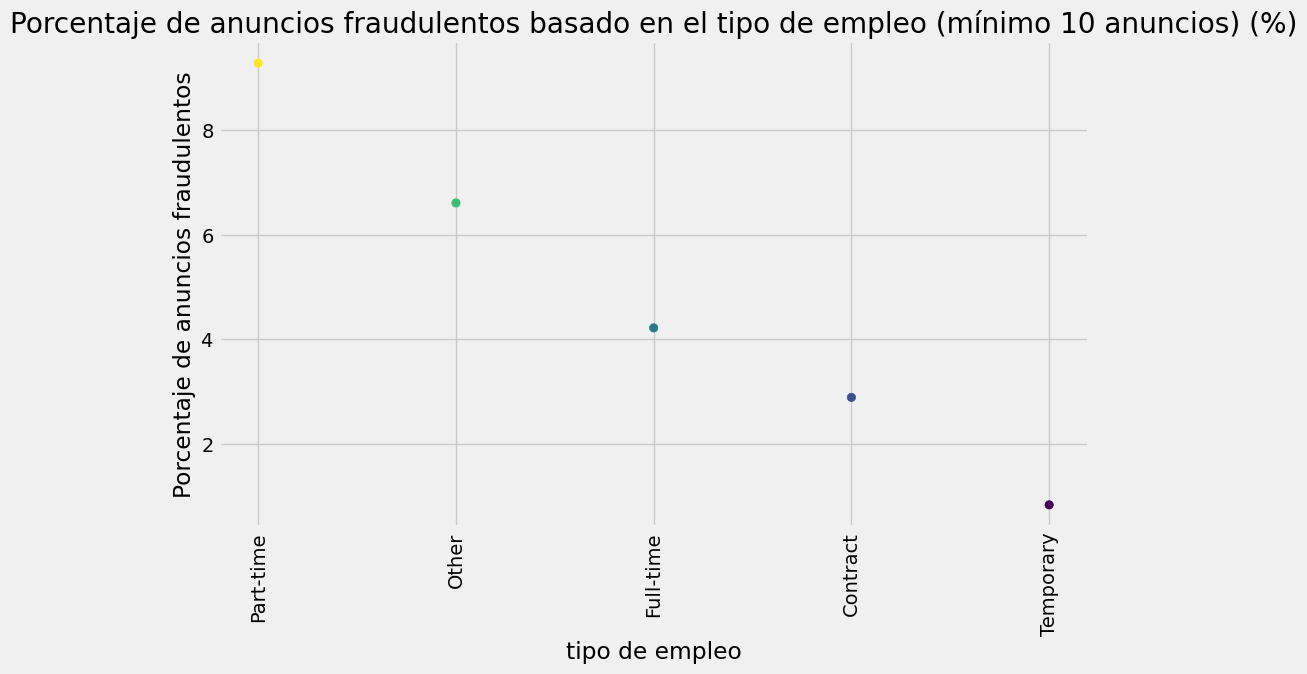

In [61]:
#Numero de anuncios fraudolentes basado en el tipo de empleo (%) (al menos 10 anuncios)
data_cleaned = data.dropna(subset=['employment_type', 'fraudulent'])

# Agrupamos los datos por departamento y calculamos el total de anuncios y los fraudulentos
department_counts = data_cleaned.groupby('employment_type').agg(
    total_ads=('fraudulent', 'count'),  # Total de anuncios en cada departamento
    fraudulent_ads=('fraudulent', 'sum')  # Número de anuncios fraudulentos en cada departamento
).reset_index()

department_counts = department_counts[department_counts['total_ads'] >= 10]

# Calculamos el porcentaje de anuncios fraudulentos por departamento
department_counts['fraud_percentage'] = (department_counts['fraudulent_ads'] / department_counts['total_ads']) * 100

# Ordenamos por porcentaje de anuncios fraudulentos en orden descendente
department_counts = department_counts.sort_values(by='fraud_percentage', ascending=False)

# Seleccionamos los primeros 15 departamentos para mayor legibilidad
department_counts = department_counts.head(15)

# Creamos el gráfico
plt.figure(figsize=(10, 6))
plt.scatter(department_counts['employment_type'], department_counts['fraud_percentage'], c=department_counts['fraud_percentage'], cmap='viridis')

# Etiquetas y título
plt.xlabel('tipo de empleo')
plt.ylabel('Porcentaje de anuncios fraudulentos')
plt.title('Porcentaje de anuncios fraudulentos basado en el tipo de empleo (mínimo 10 anuncios) (%)')
plt.xticks(rotation=90)
plt.show()

El tipo de empleo ‘Part Time’ registra el mayor porcentaje de fraudes en anuncios de trabajo. Este gráfico, basado en porcentajes, revela que los trabajos a tiempo parcial son los más vulnerables a estafas laborales.

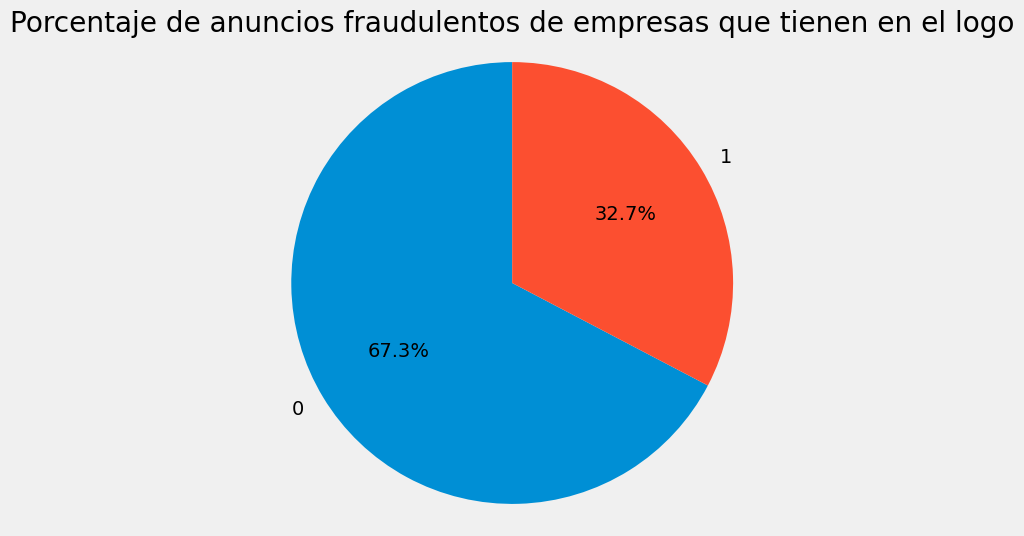

In [123]:
#Numero de anuncios fraudolentes basado en el logo de la empresa
data_cleaned = data.dropna(subset=['has_company_logo', 'fraudulent'])

data_cleaned['has_company_logo'] = data_cleaned['has_company_logo'].astype(str)

fraud_counts = data_cleaned.groupby('has_company_logo')['fraudulent'].sum().reset_index()

fraud_counts = fraud_counts.sort_values(by='fraudulent', ascending=False)

plt.figure(figsize=(10, 6))
plt.pie(fraud_counts['fraudulent'], labels=fraud_counts['has_company_logo'], 
        autopct='%1.1f%%', startangle=90)

plt.title('Porcentaje de anuncios fraudulentos de empresas que tienen en el logo')
plt.axis('equal')  # Para hacer el gráfico circular
plt.show()

Se puede ver que el 32.7% de las empresas que tienen un logo tiene anuncios fraudolentes y el 67.3% no tienen anuncios fraudolentes.

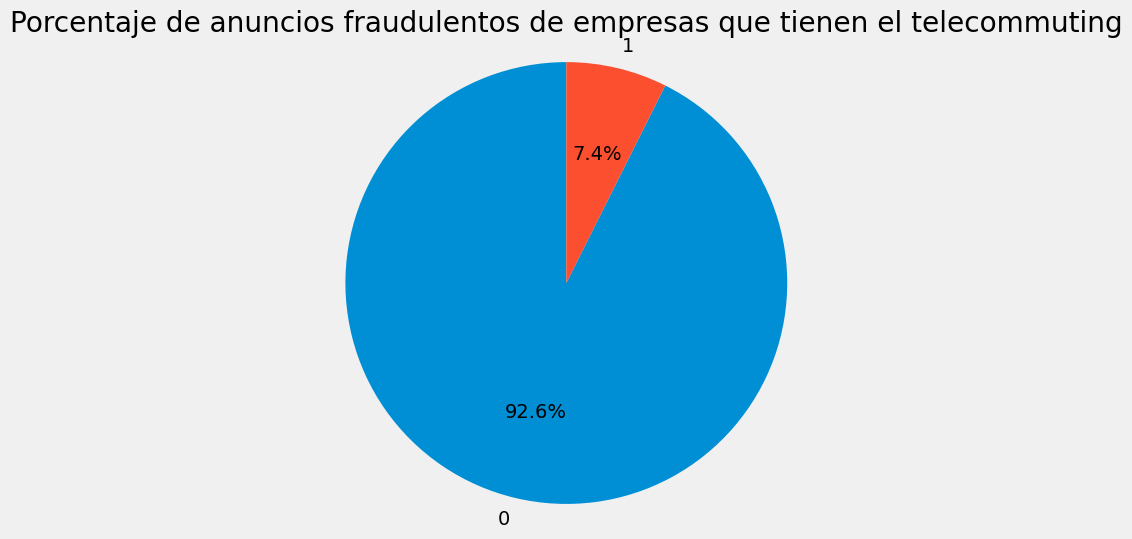

In [126]:
#Numero de anuncios fraudolentes que tienen en el telecommuting
data_cleaned = data.dropna(subset=['telecommuting', 'fraudulent'])

data_cleaned['telecommuting'] = data_cleaned['telecommuting'].astype(str)

fraud_counts = data_cleaned.groupby('telecommuting')['fraudulent'].sum().reset_index()

fraud_counts = fraud_counts.sort_values(by='fraudulent', ascending=False)

plt.figure(figsize=(10, 6))
plt.pie(fraud_counts['fraudulent'], labels=fraud_counts['telecommuting'], 
        autopct='%1.1f%%', startangle=90)

plt.title('Porcentaje de anuncios fraudulentos de empresas que tienen el telecommuting')
plt.axis('equal')  # Para hacer el gráfico circular
plt.show()

Se puede ver que el 7.4% de las empresas que tienen un logo tiene anuncios fraudolentes y el 92.6% no tienen anuncios fraudolentes

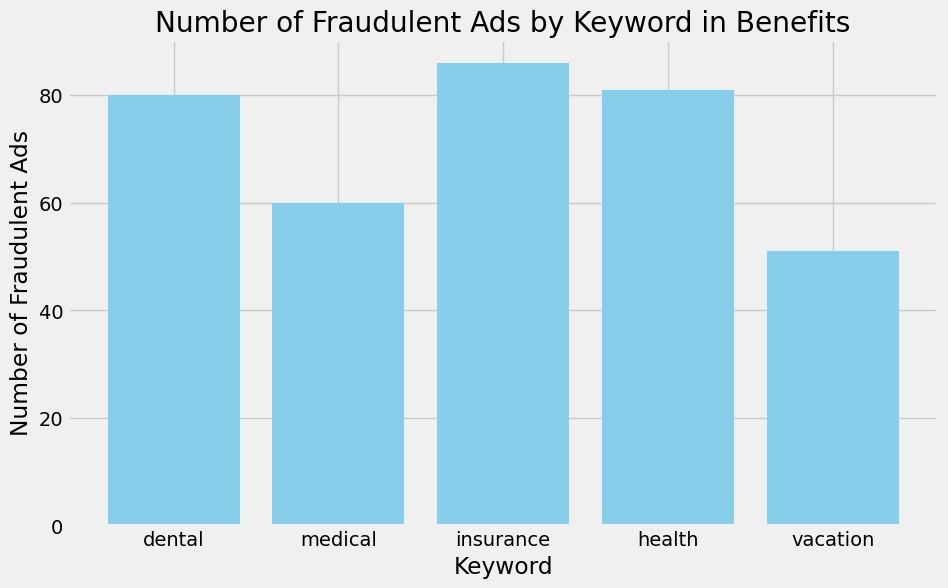

In [53]:
#Benefits
# Lista de palabras clave a buscar en 'benefits'
keywords = ["dental", "medical", "insurance", "health", "vacation"]

# Inicializa un diccionario para contar las ocurrencias de cada palabra clave en anuncios fraudulentos
fraud_counts = {word: 0 for word in keywords}

# Recorre cada palabra clave y cuenta los anuncios fraudulentos que la contienen en 'benefits'
for word in keywords:
    fraud_counts[word] = data[data['fraudulent'] == 1]['benefits'].str.contains(word, case=False).sum()

# Convierte el diccionario a un DataFrame para facilitar la visualización
fraud_counts_df = pd.DataFrame(list(fraud_counts.items()), columns=['Keyword', 'Fraudulent Ads Count'])

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(fraud_counts_df['Keyword'], fraud_counts_df['Fraudulent Ads Count'], color='skyblue')
plt.xlabel('Keyword')
plt.ylabel('Number of Fraudulent Ads')
plt.title('Number of Fraudulent Ads by Keyword in Benefits')
plt.show()

Hemos seleccionado las palabras clave más interesantes en las descripciones de beneficios.

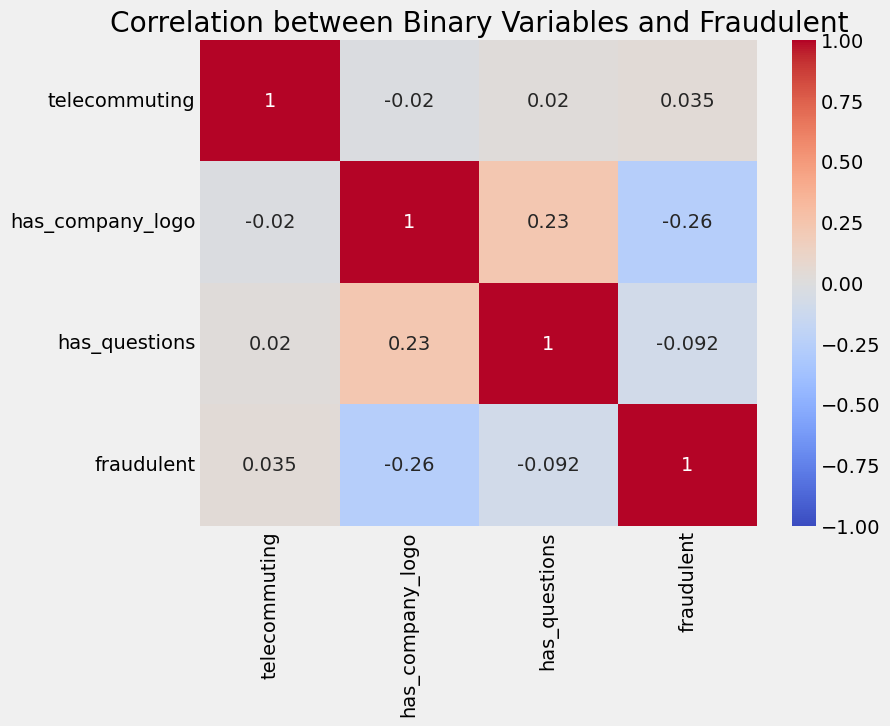

In [67]:
# Calcula la matriz de correlación
corr_matrix = data[['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']].corr()

# Genera el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Binary Variables and Fraudulent')
plt.show()

La matriz de correlación revela una correlación moderada entre las variables has_questions y has_logo. Luego confirma que las empresas que presentan un logotipo son menos propensas a tener anuncios fraudulentos.

### Conclusiones

El análisis gráfico proporciona una comprensión amplia y detallada de las características y patrones que se relacionan con el fraude en los anuncios de empleo. A partir de los datos, se evidencia que es más probable tener un anuncio fraudulento si la educación requerida es “High school or equivalent”. Además, el gráfico de porcentajes indica que esta probabilidad es aún mayor para aquellos que tienen “Some High School Coursework”. En cuanto al departamento, los anuncios fraudulentos son más frecuentes en Engineering, mientras que el gráfico de porcentajes destaca que el departamento de Oil and Energy presenta una mayor proporción de anuncios fraudulentos.

La ciudad con mayor incidencia de fraude es Houston, TX, US, y el gráfico porcentual resalta que Austin, TX, US también tiene una significativa cantidad de anuncios fraudulentos. En relación con la experiencia requerida, los anuncios fraudulentos suelen estar asociados a niveles de Entry level, mientras que el análisis porcentual indica que el fraude es más común en posiciones executive. En cuanto al tipo de empleo, los anuncios fraudulentos son más prevalentes en Full-time, aunque el gráfico de porcentajes muestra que los anuncios de part-time también tienen una alta tasa de fraude.

Se observa que el 32.7% de las empresas que tienen un logotipo presentan anuncios fraudulentos, en contraste con el 67.3% que no los tienen. Por último, la matriz de correlación revela una correlación moderada entre las variables has_questions y has_logo, confirmando que las empresas que presentan un logotipo son menos propensas a tener anuncios fraudulentos. Estos hallazgos subrayan la importancia de considerar múltiples factores al evaluar la legitimidad de los anuncios de empleo y pueden servir como base para desarrollar estrategias de detección de fraude más efectivas.